In [ ]:
path = "C:/Users/RAZER/Desktop/TEMp/New folder/KINECT_dataset_with_qor15.csv"


In [19]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Load the CSV
csv_path = "KINECT_dataset_with_qor15.csv"  # Change if needed
df = pd.read_csv(path)
df = df[df['walking_speed'] == 'Fast'].reset_index(drop=True)

# Step 2: Define joints and edges
joints = [
    'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVICLE_LEFT', 'SHOULDER_LEFT',
    'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
    'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT',
    'HANDTIP_RIGHT', 'THUMB_RIGHT', 'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT',
    'FOOT_LEFT', 'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT',
    'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

edges = [
    ('PELVIS', 'SPINE_NAVAL'), ('SPINE_NAVAL', 'SPINE_CHEST'), ('SPINE_CHEST', 'NECK'),
    ('NECK', 'HEAD'), ('SPINE_CHEST', 'CLAVICLE_LEFT'), ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
    ('SHOULDER_LEFT', 'ELBOW_LEFT'), ('ELBOW_LEFT', 'WRIST_LEFT'), ('WRIST_LEFT', 'HAND_LEFT'),
    ('HAND_LEFT', 'HANDTIP_LEFT'), ('WRIST_LEFT', 'THUMB_LEFT'), ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
    ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'), ('SHOULDER_RIGHT', 'ELBOW_RIGHT'), ('ELBOW_RIGHT', 'WRIST_RIGHT'),
    ('WRIST_RIGHT', 'HAND_RIGHT'), ('HAND_RIGHT', 'HANDTIP_RIGHT'), ('WRIST_RIGHT', 'THUMB_RIGHT'),
    ('PELVIS', 'HIP_LEFT'), ('HIP_LEFT', 'KNEE_LEFT'), ('KNEE_LEFT', 'ANKLE_LEFT'),
    ('ANKLE_LEFT', 'FOOT_LEFT'), ('PELVIS', 'HIP_RIGHT'), ('HIP_RIGHT', 'KNEE_RIGHT'),
    ('KNEE_RIGHT', 'ANKLE_RIGHT'), ('ANKLE_RIGHT', 'FOOT_RIGHT'),
    ('HEAD', 'NOSE'), ('HEAD', 'EYE_LEFT'), ('HEAD', 'EYE_RIGHT'),
    ('HEAD', 'EAR_LEFT'), ('HEAD', 'EAR_RIGHT')
]

# Step 3: Check for missing joint columns
missing = []
for joint in joints:
    for axis in ['_X', '_Y', '_Z']:
        col = f"{joint}{axis}"
        if col not in df.columns:
            missing.append(col)

if missing:
    print("❌ Missing columns in CSV:")
    print(missing)
else:
    print("✅ All joint columns found!")

# Step 4: Select one frame
row = df[df['patient_id'] == df['patient_id'].unique()[0]].iloc[5]  # try frame 5 instead of 0


# Step 5: Extract and normalize coordinates to PELVIS
pelvis_x, pelvis_y, pelvis_z = row['PELVIS_X'], row['PELVIS_Y'], row['PELVIS_Z']
joint_coords = {}
for joint in joints:
    try:
        x = row[f'{joint}_X'] - pelvis_x
        y = row[f'{joint}_Y'] - pelvis_y
        z = row[f'{joint}_Z'] - pelvis_z
        joint_coords[joint] = (x, y, z)
    except:
        joint_coords[joint] = (0, 0, 0)  # fallback
        print(f"⚠️  Missing data for joint {joint}")

# Step 6: Print joint values for debugging
print("\n🔍 Joint Positions (Centered at Pelvis):")
for j in joints:
    print(f"{j}: {joint_coords[j]}")

# Optional: Remove facial joints for clearer skeleton view
use_joints = [j for j in joints if 'EAR' not in j and 'EYE' not in j and 'NOSE' not in j]
use_edges = [e for e in edges if e[0] in use_joints and e[1] in use_joints]

# Step 7: Prepare coordinates for plotting
x_vals = [joint_coords[j][0] for j in use_joints]
y_vals = [joint_coords[j][1] for j in use_joints]
z_vals = [joint_coords[j][2] for j in use_joints]

# Step 8: Create joint markers
joint_trace = go.Scatter3d(
    x=x_vals, y=y_vals, z=z_vals,
    mode='markers+text',
    text=use_joints,
    marker=dict(size=5, color='red'),
    textposition="top center"
)

# Step 9: Create bone edges
edge_traces = []
for j1, j2 in use_edges:
    x0, y0, z0 = joint_coords[j1]
    x1, y1, z1 = joint_coords[j2]
    edge_traces.append(go.Scatter3d(
        x=[x0, x1], y=[y0, y1], z=[z0, z1],
        mode='lines',
        line=dict(color='gray', width=4),
        hoverinfo='none'
    ))

# Step 10: Plot interactive 3D skeleton
fig = go.Figure(data=edge_traces + [joint_trace])
fig.update_layout(
    scene=dict(
        xaxis_title='X', yaxis_title='Y', zaxis_title='Z',
        aspectmode='data'
    ),
    title="🧍 3D Skeleton Debug View (Centered at Pelvis)",
    showlegend=False
)
fig.show()


✅ All joint columns found!

🔍 Joint Positions (Centered at Pelvis):
PELVIS: (0.0, 0.0, 0.0)
SPINE_NAVAL: (-399.5066233456681, -7076.70642555242, 6673.268416423641)
SPINE_CHEST: (7088.252115733914, -7935.589520171587, -513.5081133202897)
NECK: (-8.522267285784782, 51.29753377342513, -831.8636705096278)
CLAVICLE_LEFT: (-573.4424138496983, -7200.098509279901, 6670.647528455256)
SHOULDER_LEFT: (7076.722441320289, -7899.537615344231, -521.5464632016827)
ELBOW_LEFT: (-14.46005890603491, 46.2303763214868, -444.1462236083321)
WRIST_LEFT: (-712.7444817905073, -7278.28383463372, 6718.111949052108)
HAND_LEFT: (7071.510347287444, -7638.595429935546, -408.39641359816306)
HANDTIP_LEFT: (4.494631263432506, 84.80087916684079, -105.25864323112751)
THUMB_LEFT: (-922.5884438522329, -7323.006386375134, 6841.629121802942)
CLAVICLE_RIGHT: (7096.745252517537, -7417.903676762181, -405.9355645478021)
SHOULDER_RIGHT: (34.17527471024601, 39.26852383003461, 48.498890051531816)
ELBOW_RIGHT: (-885.5228968337444, -7

In [17]:
# Use cleaned joints
core_joints = [
    'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK',
    'CLAVICLE_LEFT', 'SHOULDER_LEFT', 'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
    'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT', 'HANDTIP_RIGHT', 'THUMB_RIGHT',
    'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT', 'FOOT_LEFT',
    'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT'
]
filtered_edges = [e for e in edges if e[0] in core_joints and e[1] in core_joints]

# Step 7: Prepare coordinates for plotting
x_vals = [joint_coords[j][0] for j in core_joints]
y_vals = [joint_coords[j][1] for j in core_joints]
z_vals = [joint_coords[j][2] for j in core_joints]

# Step 8: Create joint markers
joint_trace = go.Scatter3d(
    x=x_vals, y=y_vals, z=z_vals,
    mode='markers+text',
    text=core_joints,
    marker=dict(size=5, color='blue'),
    textposition="top center"
)

# Step 9: Create bone edges
edge_traces = []
for j1, j2 in filtered_edges:
    x0, y0, z0 = joint_coords[j1]
    x1, y1, z1 = joint_coords[j2]
    edge_traces.append(go.Scatter3d(
        x=[x0, x1], y=[y0, y1], z=[z0, z1],
        mode='lines',
        line=dict(color='gray', width=4),
        hoverinfo='none'
    ))

# Step 10: Plot interactive 3D skeleton
fig = go.Figure(data=edge_traces + [joint_trace])
fig.update_layout(
    scene=dict(
        xaxis_title='X', yaxis_title='Y', zaxis_title='Z',
        aspectmode='data'
    ),
    title="🧍 Filtered 3D Skeleton (Torso + Limbs)",
    showlegend=False
)
fig.show()


In [18]:
# Print coordinates for the filtered joints only
print("\n📌 Coordinates of filtered joints (centered at pelvis):")
for joint in core_joints:
    print(f"{joint}: {joint_coords[joint]}")


📌 Coordinates of filtered joints (centered at pelvis):
PELVIS: (0.0, 0.0, 0.0)
SPINE_NAVAL: (-382.9826133983633, -7263.070367328313, 6849.97728086331)
SPINE_CHEST: (7286.030307224484, -8100.648371548754, -488.4256109582617)
NECK: (3.9514603653892166, 20.067918982590527, -794.9933073510997)
CLAVICLE_LEFT: (-550.8775100097585, -7378.03400401116, 6873.123812031616)
SHOULDER_LEFT: (7264.909352652288, -8054.5933508957305, -536.9846802119005)
ELBOW_LEFT: (7.034187621476072, 35.16656848146886, -427.65422685019985)
WRIST_LEFT: (-685.4462458442371, -7498.256059237415, 6792.383920204547)
HAND_LEFT: (7251.018258998935, -7839.60692006118, -437.54079669666385)
HANDTIP_LEFT: (11.600718539750208, 137.7158207101802, -89.49397598145038)
THUMB_LEFT: (-891.3194190403383, -7580.188993965025, 6893.277007260304)
CLAVICLE_RIGHT: (7255.648884125792, -7641.491048864595, -445.5933654149116)
SHOULDER_RIGHT: (42.18547779960667, 77.44945551729597, 18.863785374632357)
ELBOW_RIGHT: (-857.0395588222568, -7636.185511

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv(path)

# Filter for 'Fast' walking speed
df_fast = df[df['walking_speed'] == 'Fast'].copy()

# Select one frame from a specific patient
example_patient_id = df_fast['patient_id'].unique()[0]
example_frame = df_fast[df_fast['patient_id'] == example_patient_id].iloc[0]


In [15]:
print("Example columns in CSV:", list(df_fast.columns)[:15])
missing = [f'{j}_X' for j in joints if f'{j}_X' not in df_fast.columns]
print("Missing joint columns:", missing)

Example columns in CSV: ['patient_id', 'trial', 'walking_speed', 't_uniform', 'ACC_1', 'ACC_2', 'ACC_3', 'ACC_4', 'ACC_5', 'ACC_6', 'accel_energy_total', 'footfall_event_times', 'PELVIS_X', 'SPINE_NAVAL_X', 'SPINE_CHEST_X']
Missing joint columns: []


In [3]:
# Define joints to extract
joints = ['PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVICLE_LEFT', 'SHOULDER_LEFT',
          'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
          'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT',
          'HANDTIP_RIGHT', 'THUMB_RIGHT', 'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT',
          'FOOT_LEFT', 'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT',
          'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT']

# Get pelvis position for normalization
pelvis_x = example_frame['PELVIS_X']
pelvis_y = example_frame['PELVIS_Y']
pelvis_z = example_frame['PELVIS_Z']

# Extract and normalize joint positions
joint_coords = {}
for joint in joints:
    x = example_frame[f"{joint}_X"] - pelvis_x
    y = example_frame[f"{joint}_Y"] - pelvis_y
    z = example_frame[f"{joint}_Z"] - pelvis_z
    joint_coords[joint] = (x, y, z)

# Preview a few
for j in list(joint_coords.keys())[:5]:
    print(f"{j}: {joint_coords[j]}")


PELVIS: (0.0, 0.0, 0.0)
SPINE_NAVAL: (-382.9826133983633, -7263.070367328313, 6849.97728086331)
SPINE_CHEST: (7286.030307224484, -8100.648371548754, -488.4256109582617)
NECK: (3.9514603653892166, 20.067918982590527, -794.9933073510997)
CLAVICLE_LEFT: (-550.8775100097585, -7378.03400401116, 6873.123812031616)


In [4]:
edges = [('PELVIS', 'SPINE_NAVAL'), ('SPINE_NAVAL', 'SPINE_CHEST'), ('SPINE_CHEST', 'NECK'),
         ('NECK', 'HEAD'), ('SPINE_CHEST', 'CLAVICLE_LEFT'), ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
         ('SHOULDER_LEFT', 'ELBOW_LEFT'), ('ELBOW_LEFT', 'WRIST_LEFT'), ('WRIST_LEFT', 'HAND_LEFT'),
         ('HAND_LEFT', 'HANDTIP_LEFT'), ('WRIST_LEFT', 'THUMB_LEFT'), ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
         ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'), ('SHOULDER_RIGHT', 'ELBOW_RIGHT'), ('ELBOW_RIGHT', 'WRIST_RIGHT'),
         ('WRIST_RIGHT', 'HAND_RIGHT'), ('HAND_RIGHT', 'HANDTIP_RIGHT'), ('WRIST_RIGHT', 'THUMB_RIGHT'),
         ('PELVIS', 'HIP_LEFT'), ('HIP_LEFT', 'KNEE_LEFT'), ('KNEE_LEFT', 'ANKLE_LEFT'),
         ('ANKLE_LEFT', 'FOOT_LEFT'), ('PELVIS', 'HIP_RIGHT'), ('HIP_RIGHT', 'KNEE_RIGHT'),
         ('KNEE_RIGHT', 'ANKLE_RIGHT'), ('ANKLE_RIGHT', 'FOOT_RIGHT'),
         ('HEAD', 'NOSE'), ('HEAD', 'EYE_LEFT'), ('HEAD', 'EYE_RIGHT'),
         ('HEAD', 'EAR_LEFT'), ('HEAD', 'EAR_RIGHT')]


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader, Dataset, Data
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Define joints and edges
joints = [
    'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVICLE_LEFT', 'SHOULDER_LEFT',
    'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
    'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT',
    'HANDTIP_RIGHT', 'THUMB_RIGHT', 'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT',
    'FOOT_LEFT', 'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT',
    'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

edges = [
    ('PELVIS', 'SPINE_NAVAL'), ('SPINE_NAVAL', 'SPINE_CHEST'), ('SPINE_CHEST', 'NECK'),
    ('NECK', 'HEAD'), ('SPINE_CHEST', 'CLAVICLE_LEFT'), ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
    ('SHOULDER_LEFT', 'ELBOW_LEFT'), ('ELBOW_LEFT', 'WRIST_LEFT'), ('WRIST_LEFT', 'HAND_LEFT'),
    ('HAND_LEFT', 'HANDTIP_LEFT'), ('WRIST_LEFT', 'THUMB_LEFT'), ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
    ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'), ('SHOULDER_RIGHT', 'ELBOW_RIGHT'), ('ELBOW_RIGHT', 'WRIST_RIGHT'),
    ('WRIST_RIGHT', 'HAND_RIGHT'), ('HAND_RIGHT', 'HANDTIP_RIGHT'), ('WRIST_RIGHT', 'THUMB_RIGHT'),
    ('PELVIS', 'HIP_LEFT'), ('HIP_LEFT', 'KNEE_LEFT'), ('KNEE_LEFT', 'ANKLE_LEFT'),
    ('ANKLE_LEFT', 'FOOT_LEFT'), ('PELVIS', 'HIP_RIGHT'), ('HIP_RIGHT', 'KNEE_RIGHT'),
    ('KNEE_RIGHT', 'ANKLE_RIGHT'), ('ANKLE_RIGHT', 'FOOT_RIGHT'),
    ('HEAD', 'NOSE'),('HEAD','EYE_LEFT'), ('HEAD', 'EYE_RIGHT'), ('HEAD', 'EAR_LEFT'), ('HEAD', 'EAR_RIGHT')
]

joint_to_idx = {joint: idx for idx, joint in enumerate(joints)}

edge_index = torch.tensor(
    [[joint_to_idx[src], joint_to_idx[dst]] for src, dst in edges] +
    [[joint_to_idx[dst], joint_to_idx[src]] for src, dst in edges],  # Bidirectional edges
    dtype=torch.long)

In [9]:
import plotly.graph_objects as go

# Create 3D edges
edge_traces = []
for j1, j2 in edges:
    x0, y0, z0 = joint_coords[j1]
    x1, y1, z1 = joint_coords[j2]
    edge_traces.append(go.Scatter3d(
        x=[x0, x1], y=[y0, y1], z=[z0, z1],
        mode='lines',
        line=dict(color='gray', width=4),
        hoverinfo='none'
    ))

# Create 3D joint markers
x_vals = [coord[0] for coord in joint_coords.values()]
y_vals = [coord[1] for coord in joint_coords.values()]
z_vals = [coord[2] for coord in joint_coords.values()]
labels = list(joint_coords.keys())

joint_trace = go.Scatter3d(
    x=x_vals, y=y_vals, z=z_vals,
    mode='markers+text',
    marker=dict(size=5, color='red'),
    text=labels,
    textposition="top center"
)

# Combine into a figure
fig = go.Figure(data=edge_traces + [joint_trace])
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X'), yaxis=dict(title='Y'), zaxis=dict(title='Z'),
        aspectmode='data'
    ),
    title="3D Human Skeleton (Normalized to Pelvis)",
    showlegend=False
)

fig.show()


In [7]:
dataframe

,patient_id,trial,walking_speed,t_uniform,ACC_1,ACC_2,ACC_3,ACC_4,ACC_5,ACC_6,...,NOSE_Z,EYE_LEFT_Z,EAR_LEFT_Z,EYE_RIGHT_Z,EAR_RIGHT_Z,left_foot_swing,pelvis_pos,right_foot_swing,qor15_score,QoR_class
0,001-LO,Trial4,Fast,0.001646,1.060914e-07,2.811981e-08,2.464734e-08,1.511133e-07,6.088732e-08,2.521242e-08,...,-1062.272713,7108.170184,-114.104415,-1046.162440,7230.420053,115.919472,0.000000,17.725769,92.0,1.0
1,001-LO,Trial4,Fast,0.021627,5.940475e-08,8.744008e-08,3.596533e-08,1.409464e-07,1.330034e-07,8.532096e-08,...,-1067.001900,7077.772048,-109.613466,-1035.117093,7194.746026,146.795342,36.722235,64.687058,92.0,1.0
2,001-LO,Trial4,Fast,0.041607,4.536440e-08,8.054273e-08,6.073777e-08,5.997389e-08,9.580592e-08,2.747907e-08,...,-1071.731086,7047.373913,-105.122517,-1024.071745,7159.071999,177.671212,73.444469,111.648347,92.0,1.0
3,001-LO,Trial4,Fast,0.061588,3.443630e-08,9.337871e-09,5.133352e-08,1.558557e-07,5.318491e-08,1.614723e-07,...,-1076.460273,7016.975777,-100.631568,-1013.026398,7123.397972,208.547082,110.166704,158.609636,92.0,1.0
4,001-LO,Trial4,Fast,0.081568,5.839159e-08,6.049488e-08,4.505175e-08,1.287962e-07,1.261326e-07,2.601005e-08,...,-1079.380860,6990.668229,-97.752732,-1044.910963,7105.608067,179.849426,150.343338,177.675136,92.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97648,103-EL,Trial3,Fast,4.307818,5.358699e-08,9.066990e-08,3.733342e-08,1.771741e-08,8.524296e-08,1.715400e-08,...,-2623.616164,7241.059109,-444.622197,-2630.390786,7138.317777,92.792135,6848.844990,-117.298572,147.0,0.0
97649,103-EL,Trial3,Fast,4.327799,9.235556e-08,1.116539e-07,6.954495e-08,9.151058e-08,7.932996e-08,1.802133e-07,...,-2605.963981,7164.198164,-480.862507,-2633.766639,7132.384908,126.446190,6913.969946,51.381961,147.0,0.0
97650,103-EL,Trial3,Fast,4.347779,1.015234e-07,5.848282e-08,9.328541e-08,7.571804e-08,7.700965e-08,1.199538e-07,...,-2588.311797,7087.337220,-517.102818,-2637.142491,7126.452040,160.100246,6979.094902,220.062494,147.0,0.0
97651,103-EL,Trial3,Fast,4.367759,1.249084e-06,6.477975e-06,1.173002e-05,1.850951e-05,3.302622e-05,1.555973e-07,...,-2570.659614,7010.476275,-553.343128,-2640.518343,7120.519171,193.754301,7044.219857,388.743027,147.0,0.0


In [4]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
import os


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Define joints and edges
joints = [
    'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVICLE_LEFT', 'SHOULDER_LEFT',
    'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
    'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT',
    'HANDTIP_RIGHT', 'THUMB_RIGHT', 'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT',
    'FOOT_LEFT', 'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT',
    'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

edges = [
    ('PELVIS', 'SPINE_NAVAL'), ('SPINE_NAVAL', 'SPINE_CHEST'), ('SPINE_CHEST', 'NECK'),
    ('NECK', 'HEAD'), ('SPINE_CHEST', 'CLAVICLE_LEFT'), ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
    ('SHOULDER_LEFT', 'ELBOW_LEFT'), ('ELBOW_LEFT', 'WRIST_LEFT'), ('WRIST_LEFT', 'HAND_LEFT'),
    ('HAND_LEFT', 'HANDTIP_LEFT'), ('WRIST_LEFT', 'THUMB_LEFT'), ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
    ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'), ('SHOULDER_RIGHT', 'ELBOW_RIGHT'), ('ELBOW_RIGHT', 'WRIST_RIGHT'),
    ('WRIST_RIGHT', 'HAND_RIGHT'), ('HAND_RIGHT', 'HANDTIP_RIGHT'), ('WRIST_RIGHT', 'THUMB_RIGHT'),
    ('PELVIS', 'HIP_LEFT'), ('HIP_LEFT', 'KNEE_LEFT'), ('KNEE_LEFT', 'ANKLE_LEFT'),
    ('ANKLE_LEFT', 'FOOT_LEFT'), ('PELVIS', 'HIP_RIGHT'), ('HIP_RIGHT', 'KNEE_RIGHT'),
    ('KNEE_RIGHT', 'ANKLE_RIGHT'), ('ANKLE_RIGHT', 'FOOT_RIGHT'),
    ('HEAD', 'NOSE'), ('HEAD', 'EYE_LEFT'), ('HEAD', 'EYE_RIGHT'), ('HEAD', 'EAR_LEFT'), ('HEAD', 'EAR_RIGHT')
]

joint_to_idx = {joint: idx for idx, joint in enumerate(joints)}

edge_index = torch.tensor(
    [[joint_to_idx[src], joint_to_idx[dst]] for src, dst in edges] +
    [[joint_to_idx[dst], joint_to_idx[src]] for src, dst in edges],  # Bidirectional edges
    dtype=torch.long
).t()


# Custom Dataset Class
class SkeletonDataset(Dataset):
    def __init__(self, csv_file):
        self.data = csv_file
        self.num_nodes = len(joints)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        
        # Extract node features including timestamp
        node_features = []
        for joint in joints:
            x = row[f'{joint}_X']
            y = row[f'{joint}_Y']
            z = row[f'{joint}_Z']
            timestamp = row['t_uniform']
            node_features.append([x, y, z, timestamp])
        x = torch.tensor(node_features, dtype=torch.float32)

        # Binary label (0 or 1)
        y = torch.tensor(row['QoR_class'], dtype=torch.float32).view(-1)

        return Data(x=x, edge_index=edge_index, y=y)




data_path = "C:/Users/RAZER/Desktop/TEMp/New folder/KINECT_dataset_with_qor15.csv"
dataframe = pd.read_csv(data_path)
dataframe = dataframe[dataframe['walking_speed'] == "Fast"]


# Load dataset
dataset = SkeletonDataset(csv_file=dataframe[dataframe['walking_speed'] == "Fast"])




# Split into training and testing datasets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])



# Create DataLoaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



Using device: cuda


c:\Users\RAZER\anaconda3\envs\torch_on\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
# Print a single data point (e.g., the first sample)
sample_index = 0
data_point = dataset[sample_index]

print("Node Features (Shape):", data_point.x.shape)
print("Node Features (Values):", data_point.x)
print("\nEdge Index (Shape):", data_point.edge_index.shape)
print("Edge Index (Values):", data_point.edge_index)
print("\nLabel (Shape):", data_point.y.shape)
print("Label (Value):", data_point.y)


Node Features (Shape): torch.Size([32, 4])
Node Features (Values): tensor([[-3.6174e+01,  7.2070e+03,  3.7431e+02,  1.6463e-03],
        [-4.1916e+02, -5.6106e+01,  7.2243e+03,  1.6463e-03],
        [ 7.2499e+03, -8.9368e+02, -1.1412e+02,  1.6463e-03],
        [-3.2222e+01,  7.2270e+03, -4.2069e+02,  1.6463e-03],
        [-5.8705e+02, -1.7107e+02,  7.2474e+03,  1.6463e-03],
        [ 7.2287e+03, -8.4763e+02, -1.6268e+02,  1.6463e-03],
        [-2.9139e+01,  7.2421e+03, -5.3349e+01,  1.6463e-03],
        [-7.2162e+02, -2.9129e+02,  7.1667e+03,  1.6463e-03],
        [ 7.2148e+03, -6.3264e+02, -6.3235e+01,  1.6463e-03],
        [-2.4573e+01,  7.3447e+03,  2.8481e+02,  1.6463e-03],
        [-9.2749e+02, -3.7322e+02,  7.2676e+03,  1.6463e-03],
        [ 7.2195e+03, -4.3453e+02, -7.1288e+01,  1.6463e-03],
        [ 6.0119e+00,  7.2844e+03,  3.9317e+02,  1.6463e-03],
        [-8.9321e+02, -4.2922e+02,  7.1456e+03,  1.6463e-03],
        [ 7.2123e+03, -3.9849e+02, -2.5809e+01,  1.6463e-03],
   

In [6]:
# Print a batch of data points
for batch in train_loader:
    print("\nBatch Node Features (Shape):", batch.x.shape)
    print("Batch Node Features (Values):", batch.x)
    print("\nBatch Edge Index (Shape):", batch.edge_index.shape)
    print("Batch Edge Index (Values):", batch.edge_index)
    print("\nBatch Labels (Shape):", batch.y.shape)
    print("Batch Labels (Values):", batch.y)
    break  # Print only the first batch



Batch Node Features (Shape): torch.Size([512, 4])
Batch Node Features (Values): tensor([[ 2.5303e+01,  5.5337e+03, -9.5696e+02,  3.0126e-01],
        [-1.7542e+03,  1.2727e+01,  5.9745e+03,  3.0126e-01],
        [ 5.6195e+03, -2.2204e+03, -5.3552e+01,  3.0126e-01],
        ...,
        [ 7.1085e+03, -6.1833e+02,  3.4275e+02,  1.5314e+00],
        [ 7.9038e+02,  7.4752e+03, -2.1993e+03,  1.5314e+00],
        [-1.2973e+03,  7.9872e+02,  6.8953e+03,  1.5314e+00]])

Batch Edge Index (Shape): torch.Size([2, 992])
Batch Edge Index (Values): tensor([[  0,   1,   2,  ..., 510, 509, 511],
        [  1,   2,   3,  ..., 506, 506, 506]])

Batch Labels (Shape): torch.Size([16])
Batch Labels (Values): tensor([0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.])


In [7]:
import pandas as pd

node_features_df = pd.DataFrame(data_point.x.numpy(), columns=['X', 'Y', 'Z', 'Timestamp'])
print(node_features_df.head())


             X            Y            Z  Timestamp
0   -36.173565  7206.964355   374.305511   0.001646
1  -419.156189   -56.105865  7224.282715   0.001646
2  7249.856934  -893.683899  -114.120102   0.001646
3   -32.222103  7227.032227  -420.687805   0.001646
4  -587.051086  -171.069504  7247.429199   0.001646


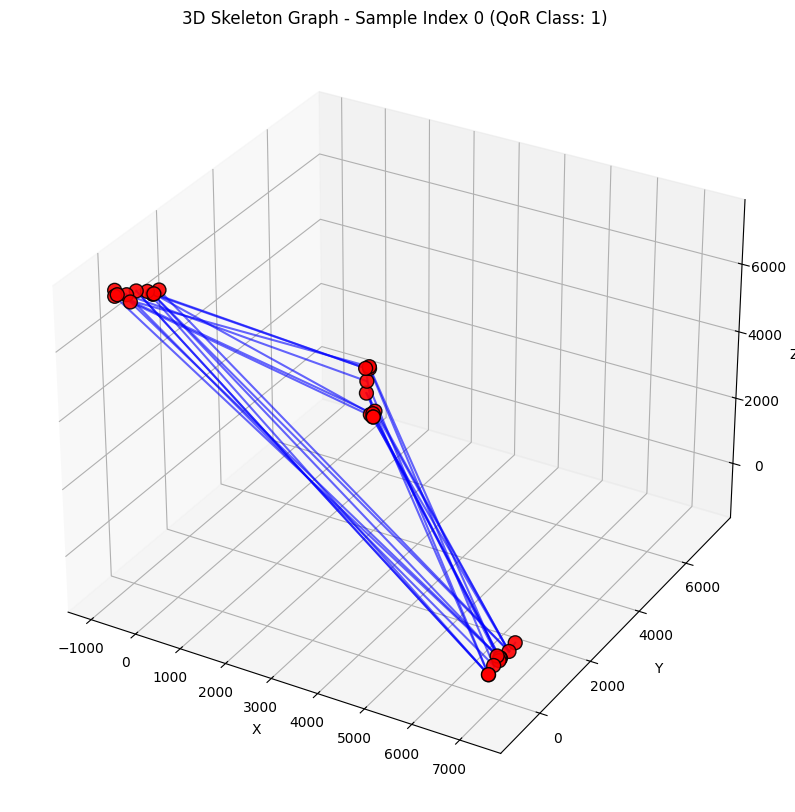

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

# Get a single sample for visualization
sample_index = 0
data_point = dataset[sample_index]

# Extract node positions
node_positions = data_point.x[:, :3].numpy()  # Use only X, Y, Z
labels = data_point.y.numpy()

# Create a directed graph
G = nx.Graph()

# Add nodes
for i, joint in enumerate(joints):
    G.add_node(joint, pos=node_positions[i])

# Add edges
for src, dst in edges:
    G.add_edge(src, dst)

# Extract positions for plotting
pos = {joint: node_positions[joint_to_idx[joint]] for joint in joints}

# Plot the graph
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot edges
for src, dst in edges:
    src_pos = pos[src]
    dst_pos = pos[dst]
    ax.plot([src_pos[0], dst_pos[0]], [src_pos[1], dst_pos[1]], [src_pos[2], dst_pos[2]], color='blue', alpha=0.6)

# Plot nodes
x, y, z = zip(*node_positions)
node_colors = ['red' if labels[0] == 1.0 else 'green'] * len(joints)  # Use binary label for coloring
ax.scatter(x, y, z, c=node_colors, s=100, edgecolors='k', alpha=0.9)

ax.set_title(f"3D Skeleton Graph - Sample Index {sample_index} (QoR Class: {int(labels[0])})")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


In [ ]:
import torch
import platform
import psutil
import time
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

report_lines = []
report_lines.append(f"=== SYSTEM & GPU REPORT ===")
report_lines.append(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
report_lines.append("")

# --- System Info ---
report_lines.append("### SYSTEM INFO ###")
report_lines.append(f"OS: {platform.system()} {platform.release()} ({platform.version()})")
report_lines.append(f"Processor: {platform.processor()}")
report_lines.append(f"CPU Cores: {psutil.cpu_count(logical=False)} physical / {psutil.cpu_count(logical=True)} logical")
report_lines.append(f"RAM: {round(psutil.virtual_memory().total / 1024**3, 2)} GB")
report_lines.append("")

# --- GPU Info ---
if torch.cuda.is_available():
    report_lines.append("### GPU INFO (CUDA) ###")
    n_gpus = torch.cuda.device_count()
    report_lines.append(f"Number of GPUs: {n_gpus}")

    for i in range(n_gpus):
        prop = torch.cuda.get_device_properties(i)
        report_lines.append(f"\n--- GPU {i} ---")
        report_lines.append(f"Name: {prop.name}")
        report_lines.append(f"Total VRAM: {prop.total_memory / 1024**3:.2f} GB")
        report_lines.append(f"Compute Capability: {prop.major}.{prop.minor}")
        report_lines.append(f"CUDA Cores (estimate): {prop.multi_processor_count * 64}")
        clock_rate = getattr(prop, "clock_rate", None)
        if clock_rate is not None:
            report_lines.append(f"Clock Rate: {clock_rate / 1e3:.0f} MHz")
        else:
            report_lines.append("Clock Rate: Not available")
        report_lines.append(f"CUDA Version (torch): {torch.version.cuda}")
else:
    report_lines.append("### GPU INFO ###")
    report_lines.append("No CUDA-capable GPU detected.")
report_lines.append("")

# --- Benchmark ---
report_lines.append("### PERFORMANCE BENCHMARK (Matrix Multiply) ###")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
times = []

try:
    for size in tqdm(sizes, desc="Benchmarking Matrix Multiply"):
        a = torch.randn((size, size), device=device)
        b = torch.randn((size, size), device=device)
        torch.cuda.synchronize() if device.type == 'cuda' else None
        t0 = time.time()
        _ = torch.matmul(a, b)
        torch.cuda.synchronize() if device.type == 'cuda' else None
        t1 = time.time()
        elapsed = t1 - t0
        times.append(elapsed)
        report_lines.append(f"{size}x{size} multiply time: {elapsed:.4f} sec")
        del a, b
        torch.cuda.empty_cache()
except Exception as e:
    report_lines.append(f"Benchmark failed: {e}")

# --- Total Benchmark Time ---
total_time = sum(times)
report_lines.append("")
report_lines.append(f"🔁 Total Matrix Multiply Time: {total_time:.4f} seconds")

# --- Save Report ---
with open("gpu_report.txt", "w") as f:
    f.write("\n".join(report_lines))

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title("Matrix Multiplication Time vs Size")
plt.xlabel("Matrix Size (N x N)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.savefig("gpu_benchmark.png")

print("✅ Report saved to gpu_report.txt")
print("✅ Benchmark plot saved as gpu_benchmark.png")
